<a href="https://colab.research.google.com/github/Sumanchy288368/LGMVIP-DataScience/blob/main/Task_2_Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
# sort with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


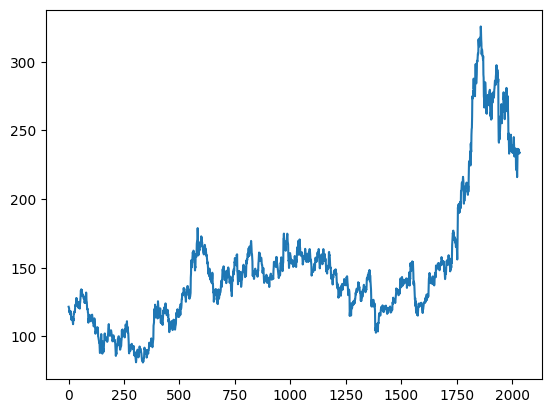

In [9]:
plt.plot(df['Close'])

In [10]:
df1=df['Close']

1. PREPARE DATA


In [11]:
# LSTM are sensitive to the scale of the data, therefore applying MinMax scaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [12]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1424, 611)

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [19]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

1. MODEL BUILDING

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' ,optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 13s 332ms/step - loss: 0.0142 - val_loss: 0.0016
Epoch 2/60
19/19 [==============================] - 4s 195ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 3/60
19/19 [==============================] - 5s 253ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 5s 283ms/step - loss: 8.4606e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 4s 194ms/step - loss: 8.2646e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 5s 247ms/step - loss: 7.8596e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 4s 204ms/step - loss: 7.6968e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 194ms/step - loss: 7.6545e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 217ms/step - loss: 7.5027e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 5s 233ms/step - loss: 

In [29]:
## Lets do the prediction and check performance metrics
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 44ms/step


In [30]:
## Transform back to original form
test_predict1=scaler.inverse_transform(test_predict)

In [31]:
test_predict1

array([[142.3808  ],
       [142.59096 ],
       [141.95958 ],
       [139.83134 ],
       [138.00609 ],
       [137.08223 ],
       [137.75153 ],
       [139.20433 ],
       [139.98703 ],
       [139.90015 ],
       [139.53874 ],
       [140.14622 ],
       [140.86526 ],
       [142.30704 ],
       [144.40694 ],
       [143.61607 ],
       [141.6302  ],
       [140.64497 ],
       [140.77159 ],
       [144.59474 ],
       [149.09627 ],
       [152.0923  ],
       [153.02504 ],
       [151.41861 ],
       [150.51224 ],
       [150.038   ],
       [150.44048 ],
       [152.06651 ],
       [153.23213 ],
       [153.53893 ],
       [153.68707 ],
       [152.64233 ],
       [149.84529 ],
       [144.85608 ],
       [140.91226 ],
       [139.10294 ],
       [138.919   ],
       [138.5472  ],
       [136.88136 ],
       [133.65524 ],
       [130.73065 ],
       [128.91356 ],
       [126.98033 ],
       [126.03113 ],
       [124.46698 ],
       [122.284294],
       [121.17781 ],
       [120.6

In [33]:
## Calculate RMSE performance matrices 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.04438052279183359